In [ ]:
!kaggle datasets download -d moltean/fruits

Dataset URL: https://www.kaggle.com/datasets/moltean/fruits
License(s): CC-BY-SA-4.0
100% 962M/964M [00:51<00:00, 21.8MB/s]
100% 964M/964M [00:51<00:00, 19.5MB/s]


In [ ]:
!unzip fruits.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: fruits-360_dataset_original-size/fruits-360-original-size/Training/apple_red_yellow_1/r0_96.jpg  
  inflating: fruits-360_dataset_original-size/fruits-360-original-size/Training/apple_red_yellow_1/r0_98.jpg  
  inflating: fruits-360_dataset_original-size/fruits-360-original-size/Training/apple_red_yellow_1/r1_0.jpg  
  inflating: fruits-360_dataset_original-size/fruits-360-original-size/Training/apple_red_yellow_1/r1_10.jpg  
  inflating: fruits-360_dataset_original-size/fruits-360-original-size/Training/apple_red_yellow_1/r1_100.jpg  
  inflating: fruits-360_dataset_original-size/fruits-360-original-size/Training/apple_red_yellow_1/r1_102.jpg  
  inflating: fruits-360_dataset_original-size/fruits-360-original-size/Training/apple_red_yellow_1/r1_104.jpg  
  inflating: fruits-360_dataset_original-size/fruits-360-original-size/Training/apple_red_yellow_1/r1_106.jpg  
  inflating: fruits-360_dataset_original-

In [ ]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

from keras.layers import Dense, Input, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from keras.models import Sequential
from keras.preprocessing import image_dataset_from_directory

In [ ]:
ds = image_dataset_from_directory('/content/fruits-360_dataset_100x100/fruits-360/Training', image_size=(100, 100), batch_size=512)

Found 70491 files belonging to 141 classes.


In [ ]:
test_ds = image_dataset_from_directory('/content/fruits-360_dataset_100x100/fruits-360/Test', image_size=(100, 100), batch_size=512)

Found 23619 files belonging to 141 classes.


In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = ds.prefetch(buffer_size = AUTOTUNE)
# val_ds = val_ds.prefetch(buffer_size = AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size = AUTOTUNE)

In [ ]:
model = Sequential()

model.add(Input((100, 100, 3)))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(141, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 100, 100, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 50, 50, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 50, 50, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 25, 25, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       9,437,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 141)                 │          72,333 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,603,277 (36.63 MB)

 Trainable params: 9,603,277 (36.63 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile('adam', 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=5)

Epoch 1/5
138/138 ━━━━━━━━━━━━━━━━━━━━ 43s 207ms/step - accuracy: 0.5139 - loss: 15.5885
Epoch 2/5
138/138 ━━━━━━━━━━━━━━━━━━━━ 20s 143ms/step - accuracy: 0.9934 - loss: 0.0260
Epoch 3/5
138/138 ━━━━━━━━━━━━━━━━━━━━ 21s 144ms/step - accuracy: 0.9962 - loss: 0.0138
Epoch 4/5
138/138 ━━━━━━━━━━━━━━━━━━━━ 20s 144ms/step - accuracy: 0.9962 - loss: 0.0147
Epoch 5/5
138/138 ━━━━━━━━━━━━━━━━━━━━ 20s 145ms/step - accuracy: 0.9977 - loss: 0.0076


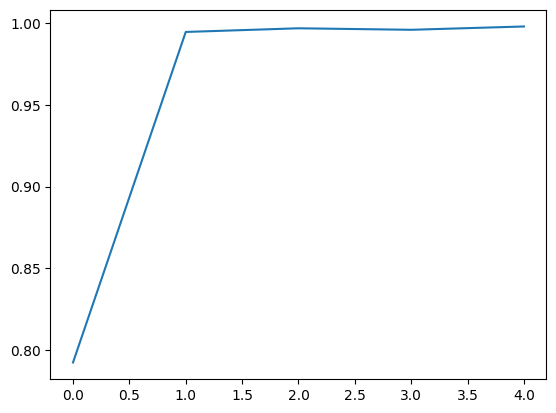

In [ ]:
plt.plot(history.history['accuracy'])

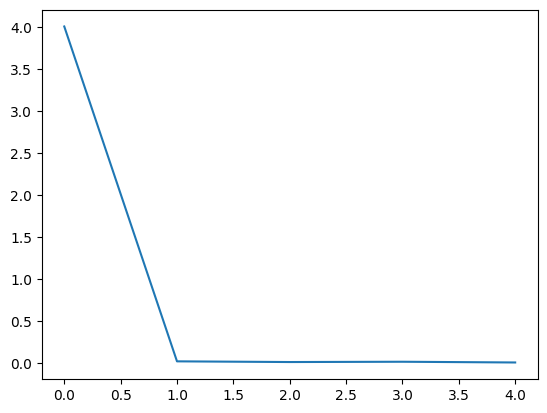

In [ ]:
plt.plot(history.history['loss'])